# 3. Portfoilo for Stock Dividend & Split

### *- A portfolio that holds all stocks that either initiated a dividend or a split in the previous 12 months.*

## 3.1 Commons

In [80]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [97]:
stocks_all=pd.read_csv("stocks.csv",index_col=0)

C:\Users\cl44343\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [98]:
stocks_all.loc[np.isnan(stocks_all['return_incl_divs']), 'return_incl_divs' ] = 0
stocks_all.loc[np.isnan(stocks_all['return_ex_divs']),   'return_ex_divs'   ] = 0
stocks_all.loc[np.isnan(stocks_all['shrout_adj_factor']),'shrout_adj_factor'] = 0
stocks_all.loc[np.isnan(stocks_all['price']),            'price'            ] = 0
stocks_all.loc[np.isnan(stocks_all['shrout']),           'shrout'           ] = 0

In [99]:
stocks_all["dividend_occured"]=np.nan
stocks_all.loc[stocks_all["return_incl_divs"]!=stocks_all["return_ex_divs"],"dividend_occured"]=1
stocks_all.loc[stocks_all["return_incl_divs"]==stocks_all["return_ex_divs"],"dividend_occured"]=np.nan

In [100]:
stocks_all["split_occured"]=np.nan
stocks_all.loc[stocks_all["shrout_adj_factor"]==0,  "split_occured"] = 0
stocks_all.loc[stocks_all["shrout_adj_factor"]!=0,  "split_occured"] = 1

In [101]:
stocks_all["date"]=pd.to_datetime(stocks_all["date"])

In [102]:
first_half, second_half = np.split(np.unique(stocks_all["date"]),2)

In [103]:
stocks_all=stocks_all.set_index(['stock_ID'])

In [104]:
stocks_div = stocks_all.groupby(level=['stock_ID']).nth(0, dropna='any')
stocks_div

,date,ticker,shrout_adj_factor,price,return_incl_divs,shrout,return_ex_divs,crsp_value_w_ret,mktrf,smb,hml,rf,mom,tm,dividend_occured,split_occured
stock_ID,,,,,,,,,,,,,,,,
10000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,1986-03-31,GFGC,0.0,6.312500,0.025200,985.0,0.010000,0.053885,0.0488,-0.0053,-0.0047,0.0060,0.0245,1986m3,1.0,0.0
10002,1993-10-29,SABC,0.0,13.500000,0.042308,2999.0,0.038462,0.018064,0.0141,0.0145,-0.0157,0.0022,-0.0267,1993m10,1.0,0.0
10003,1987-08-31,GCBK,0.0,17.875000,0.065185,2191.0,0.059259,0.037146,0.0352,-0.0072,-0.0090,0.0047,-0.0086,1987m8,1.0,0.0
10005,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10008,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10009,1986-09-30,CAYB,0.0,11.500000,-0.092157,897.0,-0.098039,-0.079021,-0.0860,0.0228,0.0322,0.0045,-0.0587,1986m9,1.0,0.0
10010,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
stocks_div = stocks_div[stocks_div['dividend_occured'] > 0]
stocks_div

,date,ticker,shrout_adj_factor,price,return_incl_divs,shrout,return_ex_divs,crsp_value_w_ret,mktrf,smb,hml,rf,mom,tm,dividend_occured,split_occured
stock_ID,,,,,,,,,,,,,,,,
10001,1986-03-31,GFGC,0.0,6.312500,0.025200,985.0,0.010000,0.053885,0.0488,-0.0053,-0.0047,0.0060,0.0245,1986m3,1.0,0.0
10002,1993-10-29,SABC,0.0,13.500000,0.042308,2999.0,0.038462,0.018064,0.0141,0.0145,-0.0157,0.0022,-0.0267,1993m10,1.0,0.0
10003,1987-08-31,GCBK,0.0,17.875000,0.065185,2191.0,0.059259,0.037146,0.0352,-0.0072,-0.0090,0.0047,-0.0086,1987m8,1.0,0.0
10009,1986-09-30,CAYB,0.0,11.500000,-0.092157,897.0,-0.098039,-0.079021,-0.0860,0.0228,0.0322,0.0045,-0.0587,1986m9,1.0,0.0
10016,1986-02-28,FIGIA,0.0,53.500000,0.394545,4590.0,0.389610,0.072500,0.0713,-0.0063,-0.0089,0.0053,0.0275,1986m2,1.0,0.0
10019,1987-11-30,IFRS,0.0,6.000000,-0.028000,6175.0,-0.040000,-0.072273,-0.0777,0.0277,0.0314,0.0035,-0.0114,1987m11,1.0,0.0
10020,1986-03-31,KEYC,0.0,36.500000,-0.169492,4240.0,-0.175141,0.053885,0.0488,-0.0053,-0.0047,0.0060,0.0245,1986m3,1.0,0.0
10025,1993-06-30,AEPI,0.0,17.000000,0.080952,4852.0,0.079365,0.005440,0.0031,-0.0029,0.0263,0.0025,0.0457,1993m6,1.0,0.0
10026,2004-12-31,JJSF,0.0,49.029999,0.043409,9022.0,0.040756,0.035178,0.0343,0.0012,-0.0006,0.0016,-0.0284,2004m12,1.0,0.0


In [106]:
stocks_all = stocks_all.reset_index()
stocks_div = stocks_div.reset_index()
stocks_all = stocks_all.set_index(['stock_ID','date'])
stocks_div = stocks_div.set_index(['stock_ID','date'])

In [107]:
stocks_all['dividend_occured']            = stocks_div['dividend_occured']
stocks_all['dividend_occured_last_month'] = stocks_all['dividend_occured'].shift(1).fillna(0)

In [108]:
dividend_occured_last_12 = stocks_all.groupby(level='stock_ID').dividend_occured_last_month.apply(lambda x: x.rolling(window=12,min_periods=1).sum())

In [109]:
dividend_occured_last_12

stock_ID  date      
10000     1986-01-31    0.0
          1986-02-28    0.0
          1986-03-31    0.0
          1986-04-30    0.0
          1986-05-30    0.0
          1986-06-30    0.0
          1986-07-31    0.0
          1986-08-29    0.0
          1986-09-30    0.0
          1986-10-31    0.0
          1986-11-28    0.0
          1986-12-31    0.0
          1987-01-30    0.0
          1987-02-27    0.0
          1987-03-31    0.0
          1987-04-30    0.0
          1987-05-29    0.0
          1987-06-30    0.0
10001     1986-01-31    0.0
          1986-02-28    0.0
          1986-03-31    0.0
          1986-04-30    1.0
          1986-05-30    1.0
          1986-06-30    1.0
          1986-07-31    1.0
          1986-08-29    1.0
          1986-09-30    1.0
          1986-10-31    1.0
          1986-11-28    1.0
          1986-12-31    1.0
                       ... 
93436     2015-07-31    0.0
          2015-08-31    0.0
          2015-09-30    0.0
          2015-10-30    0.0

In [110]:
stocks_all["dividend_occured_last_12"]=dividend_occured_last_12

In [111]:
stocks_all

ticker  shrout_adj_factor       price  return_incl_divs  \
stock_ID date                                                                 
10000    1986-01-31  OMFGA                0.0    4.375000          0.000000   
         1986-02-28  OMFGA                0.0    3.250000         -0.257143   
         1986-03-31  OMFGA                0.0    4.437500          0.365385   
         1986-04-30  OMFGA                0.0    4.000000         -0.098592   
         1986-05-30  OMFGA                0.0    3.109375         -0.222656   
         1986-06-30  OMFGA                0.0    3.093750         -0.005025   
         1986-07-31  OMFGA                0.0    2.843750         -0.080808   
         1986-08-29  OMFGA                0.0    1.093750         -0.615385   
         1986-09-30  OMFGA                0.0    1.031250         -0.057143   
         1986-10-31  OMFGA                0.0    0.781250         -0.242424   
         1986-11-28  OMFGA                0.0    0.828125          0.060000   
         1986-12-31  OMFGA                0.0    0.515625         -0.377358   
         1987-01-30  OMFGA                0.0    0.406250         -0.212121   
         1987-02-27  OMFGA                0.0    0.406250          0.000000   
         1987-03-31  OMFGA                0.0    0.250000         -0.384615   
         1987-04-30  OMFGA                0.0    0.234375         -0.062500   
         1987-05-29  OMFGA                0.0    0.218750         -0.066667   
         1987-06-30  OMFGA                0.0    0.000000          0.000000   
10001    1986-01-31   GFGC                0.0    6.125000          0.000000   
         1986-02-28   GFGC                0.0    6.250000          0.020408   
         1986-03-31   GFGC                0.0    6.312500          0.025200   
         1986-04-30   GFGC                0.0    6.375000          0.009901   
         1986-05-30   GFGC                0.0    6.312500         -0.009804   
         1986-06-30   GFGC                0.0    6.125000         -0.013069   
         1986-07-31   GFGC                0.0    6.062500         -0.010204   
         1986-08-29   GFGC                0.0    6.500000          0.072165   
         1986-09-30   GFGC                0.0    6.375000         -0.003077   
         1986-10-31   GFGC                0.0    6.625000          0.039216   
         1986-11-28   GFGC                0.0    7.000000          0.056604   
         1986-12-31   GFGC                0.0    7.000000          0.015000   
...                    ...                ...         ...               ...   
93436    2015-07-31   TSLA                0.0  266.149994         -0.007866   
         2015-08-31   TSLA                0.0  249.059998         -0.064212   
         2015-09-30   TSLA                0.0  248.399994         -0.002650   
         2015-10-30   TSLA                0.0  206.929993         -0.166948   
         2015-11-30   TSLA                0.0  230.259994          0.112743   
         2015-12-31   TSLA                0.0  240.009994          0.042343   
         2016-01-29   TSLA                0.0  191.199997         -0.203367   
         2016-02-29   TSLA                0.0  191.929993          0.003818   
         2016-03-31   TSLA                0.0  229.770004          0.197155   
         2016-04-29   TSLA                0.0  240.759994          0.047830   
         2016-05-31   TSLA                0.0  223.229996         -0.072811   
         2016-06-30   TSLA                0.0  212.279999         -0.049053   
         2016-07-29   TSLA                0.0  234.789993          0.106039   
         2016-08-31   TSLA                0.0  212.009994         -0.097023   
         2016-09-30   TSLA                0.0  204.029999         -0.037640   
         2016-10-31   TSLA                0.0  197.729996         -0.030878   
         2016-11-30   TSLA                0.0  189.399994         -0.042128   
         2016-12-30   TSLA                0.0  213.690002          0.1

In [112]:
#pd.DataFrame.to_csv(stocks_all, 'stocks_all_last_12_0401.csv')

In [74]:
#stocks_all=stocks_all.reset_index()

In [75]:
#stocks_all=stocks_all.set_index(['stock_ID', 'date'])

In [113]:
stocks_all['split_occured_last_month']=stocks_all['split_occured'].shift(1).fillna(0)
stocks_all['split_occured_last_12']=np.nan

In [114]:
split_occured_last_12 = stocks_all.groupby(level='stock_ID').split_occured_last_month.apply(lambda x: x.rolling(window=12,min_periods=1).sum())

In [115]:
split_occured_last_12

stock_ID  date      
10000     1986-01-31    0.0
          1986-02-28    0.0
          1986-03-31    0.0
          1986-04-30    0.0
          1986-05-30    0.0
          1986-06-30    0.0
          1986-07-31    0.0
          1986-08-29    0.0
          1986-09-30    0.0
          1986-10-31    0.0
          1986-11-28    0.0
          1986-12-31    0.0
          1987-01-30    0.0
          1987-02-27    0.0
          1987-03-31    0.0
          1987-04-30    0.0
          1987-05-29    0.0
          1987-06-30    0.0
10001     1986-01-31    0.0
          1986-02-28    0.0
          1986-03-31    0.0
          1986-04-30    0.0
          1986-05-30    0.0
          1986-06-30    0.0
          1986-07-31    0.0
          1986-08-29    0.0
          1986-09-30    0.0
          1986-10-31    0.0
          1986-11-28    0.0
          1986-12-31    0.0
                       ... 
93436     2015-07-31    0.0
          2015-08-31    0.0
          2015-09-30    0.0
          2015-10-30    0.0

In [116]:
stocks_all["split_occured_last_12"]=split_occured_last_12

In [117]:
stocks_all['div_split_occured_last_12'] = stocks_all['dividend_occured_last_12'] + stocks_all['split_occured_last_12']

In [19]:
value_price        = stocks_all["price"] * stocks_all['shrout'] 
value_price_return = stocks_all["price"] * stocks_all['shrout'] * stocks_all['return_incl_divs']

In [20]:
stocks_all["value_price"]       = value_price
stocks_all["value_price_return"]= value_price_return

In [21]:
#pd.DataFrame.to_csv(stocks_all, 'stocks_split_last_12_0331.csv')

In [22]:
stocks_all=stocks_all.reset_index()

In [24]:
rf_list    = []
mktrf_list = []                                                                
date_list  = []
for date in np.unique(stocks_all["date"]):
    date_list.append(date)
    rf_list.append(   stocks_all.loc[stocks_all["date"] ==date,"rf"   ].iloc[0])
    mktrf_list.append(stocks_all.loc[stocks_all["date"] ==date,"mktrf"].iloc[0])    # mom added

In [25]:
rf_df        =pd.DataFrame()
rf_df["date"]=date_list
rf_df["rf"]  =rf_list

In [26]:
mktrf_df=pd.DataFrame()
mktrf_df['date'] =date_list
mktrf_df['mktrf']=mktrf_list

In [27]:
rf_df.index   =pd.DatetimeIndex(rf_df["date"])
mktrf_df.index=pd.DatetimeIndex(mktrf_df['date'])

In [28]:
rf_df

,date,rf
date,,
1985-01-31,1985-01-31,0.0065
1985-02-28,1985-02-28,0.0058
1985-03-29,1985-03-29,0.0062
1985-04-30,1985-04-30,0.0072
1985-05-31,1985-05-31,0.0066
1985-06-28,1985-06-28,0.0055
1985-07-31,1985-07-31,0.0062
1985-08-30,1985-08-30,0.0055
1985-09-30,1985-09-30,0.0060


In [29]:
mktrf_df

,date,mktrf
date,,
1985-01-31,1985-01-31,0.0799
1985-02-28,1985-02-28,0.0122
1985-03-29,1985-03-29,-0.0084
1985-04-30,1985-04-30,-0.0096
1985-05-31,1985-05-31,0.0509
1985-06-28,1985-06-28,0.0127
1985-07-31,1985-07-31,-0.0074
1985-08-30,1985-08-30,-0.0102
1985-09-30,1985-09-30,-0.0454


## 1.2 Equally Weighted Portfolio

In [30]:
date_list        = []
first_half_list  = []
second_half_list = []

equally_weighted_month_return_list= []
equally_weighted_1st_half_month_return_list= []
equally_weighted_2nd_half_month_return_list= []

equally_weighted_month_excess_return_list=[]
equally_weighted_1st_half_month_excess_return_list=[]
equally_weighted_2nd_half_month_excess_return_list=[]

equally_weighted_month_mktrf_list = []
equally_weighted_1st_half_month_mktrf_list = []
equally_weighted_2nd_half_month_mktrf_list = []

for date in np.unique(stocks_all["date"]):
    date_list.append(date)    
    equally_weighted_month_return                           = stocks_all.loc[(stocks_all["date"]==date)&(stocks_all["dividend_occured_last_12"]>0),"return_incl_divs"].mean()
    equally_weighted_month_excess_return                    = equally_weighted_month_return-rf_df.loc[date,"rf"]
    equally_weighted_month_mktrf                            = mktrf_df.loc[date, 'mktrf']
    equally_weighted_month_return_list.append(                equally_weighted_month_return)
    equally_weighted_month_excess_return_list.append(         equally_weighted_month_excess_return)
    equally_weighted_month_mktrf_list.append(                 equally_weighted_month_mktrf)
    

for date in first_half:
    first_half_list.append(date)    
    equally_weighted_1st_half_month_return                  = stocks_all.loc[(stocks_all["date"]==date)&(stocks_all["dividend_occured_last_12"]>0),"return_incl_divs"].mean()
    equally_weighted_1st_half_month_excess_return           = equally_weighted_1st_half_month_return-rf_df.loc[date,"rf"]
    equally_weighted_1st_half_month_mktrf                   = mktrf_df.loc[date, 'mktrf']
    equally_weighted_1st_half_month_return_list.append(       equally_weighted_1st_half_month_return)
    equally_weighted_1st_half_month_excess_return_list.append(equally_weighted_1st_half_month_excess_return)
    equally_weighted_1st_half_month_mktrf_list.append(        equally_weighted_1st_half_month_mktrf)
    
    
for date in second_half:
    second_half_list.append(date)    
    equally_weighted_2nd_half_month_return                  = stocks_all.loc[(stocks_all["date"]==date)&(stocks_all["dividend_occured_last_12"]>0),"return_incl_divs"].mean()
    equally_weighted_2nd_half_month_excess_return           = equally_weighted_2nd_half_month_return-rf_df.loc[date,"rf"]
    equally_weighted_2nd_half_month_mktrf                   = mktrf_df.loc[date, 'mktrf']
    equally_weighted_2nd_half_month_return_list.append(       equally_weighted_2nd_half_month_return)
    equally_weighted_2nd_half_month_excess_return_list.append(equally_weighted_2nd_half_month_excess_return)
    equally_weighted_2nd_half_month_mktrf_list.append(        equally_weighted_2nd_half_month_mktrf)        

In [31]:
equally_weighted_df          = pd.DataFrame()
equally_weighted_1st_half_df = pd.DataFrame()
equally_weighted_2nd_half_df = pd.DataFrame()

equally_weighted_df["date"]                                      = date_list
equally_weighted_1st_half_df["date"]                             = first_half_list
equally_weighted_2nd_half_df["date"]                             = second_half_list

equally_weighted_df.index                                        = pd.DatetimeIndex(equally_weighted_df         ["date"])
equally_weighted_1st_half_df.index                               = pd.DatetimeIndex(equally_weighted_1st_half_df["date"])
equally_weighted_2nd_half_df.index                               = pd.DatetimeIndex(equally_weighted_2nd_half_df["date"])

equally_weighted_df         ["equally_weighted_month_mktrf"]       = equally_weighted_month_mktrf_list
equally_weighted_1st_half_df["equally_weighted_month_mktrf"]       = equally_weighted_1st_half_month_mktrf_list
equally_weighted_2nd_half_df["equally_weighted_month_mktrf"]       = equally_weighted_2nd_half_month_mktrf_list

equally_weighted_df         ["equally_weighted_month_return"]      = equally_weighted_month_return_list
equally_weighted_1st_half_df["equally_weighted_month_return"]      = equally_weighted_1st_half_month_return_list
equally_weighted_2nd_half_df["equally_weighted_month_return"]      = equally_weighted_2nd_half_month_return_list

equally_weighted_df         ["equally_weighted_month_return_excess"] = equally_weighted_month_excess_return_list
equally_weighted_1st_half_df["equally_weighted_month_return_excess"] = equally_weighted_1st_half_month_excess_return_list
equally_weighted_2nd_half_df["equally_weighted_month_return_excess"] = equally_weighted_2nd_half_month_excess_return_list

equally_weighted_df         ["equally_weighted_cum_return"]        = (equally_weighted_df         ["equally_weighted_month_return"]+1).cumprod()
equally_weighted_1st_half_df["equally_weighted_cum_return"]        = (equally_weighted_1st_half_df["equally_weighted_month_return"]+1).cumprod()
equally_weighted_2nd_half_df["equally_weighted_cum_return"]        = (equally_weighted_2nd_half_df["equally_weighted_month_return"]+1).cumprod()

equally_weighted_df         ["equally_weighted_cum_return_excess"] = (equally_weighted_df         ["equally_weighted_month_return_excess"]+1).cumprod()
equally_weighted_1st_half_df["equally_weighted_cum_return_excess"] = (equally_weighted_1st_half_df["equally_weighted_month_return_excess"]+1).cumprod()
equally_weighted_2nd_half_df["equally_weighted_cum_return_excess"] = (equally_weighted_2nd_half_df["equally_weighted_month_return_excess"]+1).cumprod()

equally_weighted_annual_ret                                      = (equally_weighted_df         ["equally_weighted_month_return"]+1).cumprod().resample('A').agg('last').pct_change()
equally_weighted_1st_half_annual_ret                             = (equally_weighted_1st_half_df["equally_weighted_month_return"]+1).cumprod().resample('A').agg('last').pct_change()
equally_weighted_2nd_half_annual_ret                             = (equally_weighted_2nd_half_df["equally_weighted_month_return"]+1).cumprod().resample('A').agg('last').pct_change()

equally_weighted_annual_ret_excess                               = (equally_weighted_df         ["equally_weighted_month_return_excess"]+1).cumprod().resample('A').agg('last').pct_change()
equally_weighted_1st_half_annual_ret_excess                      = (equally_weighted_1st_half_df["equally_weighted_month_return_excess"]+1).cumprod().resample('A').agg('last').pct_change()
equally_weighted_2nd_half_annual_ret_excess                      = (equally_weighted_2nd_half_df["equally_weighted_month_return_excess"]+1).cumprod().resample('A').agg('last').pct_change()

equally_weighted_annual_ret_excess_mean                          = equally_weighted_annual_ret_excess.mean()
equally_weighted_1st_half_annual_ret_excess_mean                 = equally_weighted_1st_half_annual_ret_excess.mean()
equally_weighted_2nd_half_annual_ret_excess_mean                 = equally_weighted_2nd_half_annual_ret_excess.mean()

equally_weighted_annual_volatility                               = equally_weighted_df         ["equally_weighted_month_return_excess"].std() * np.sqrt(12)
equally_weighted_1st_half_annual_volatility                      = equally_weighted_1st_half_df["equally_weighted_month_return_excess"].std() * np.sqrt(12)
equally_weighted_2nd_half_annual_volatility                      = equally_weighted_2nd_half_df["equally_weighted_month_return_excess"].std() * np.sqrt(12)

equally_weighted_sharpe_ratio                                    = equally_weighted_annual_ret_excess_mean          / equally_weighted_annual_volatility
equally_weighted_1st_half_sharpe_ratio                           = equally_weighted_1st_half_annual_ret_excess_mean / equally_weighted_1st_half_annual_volatility
equally_weighted_2nd_half_sharpe_ratio                           = equally_weighted_2nd_half_annual_ret_excess_mean / equally_weighted_2nd_half_annual_volatility

In [32]:
equally_weighted_df

,date,equally_weighted_month_mktrf,equally_weighted_month_return,equally_weighted_month_return_excess,equally_weighted_cum_return,equally_weighted_cum_return_excess
date,,,,,,
1985-01-31,1985-01-31,0.0799,0.108007,0.101507,1.108007,1.101507
1985-02-28,1985-02-28,0.0122,0.025201,0.019401,1.135929,1.122876
1985-03-29,1985-03-29,-0.0084,-0.003955,-0.010155,1.131436,1.111473
1985-04-30,1985-04-30,-0.0096,0.003612,-0.003588,1.135523,1.107485
1985-05-31,1985-05-31,0.0509,0.044420,0.037820,1.185963,1.149370
1985-06-28,1985-06-28,0.0127,0.023528,0.018028,1.213866,1.170091
1985-07-31,1985-07-31,-0.0074,0.016540,0.010340,1.233943,1.182190
1985-08-30,1985-08-30,-0.0102,0.002355,-0.003145,1.236850,1.178472
1985-09-30,1985-09-30,-0.0454,-0.038403,-0.044403,1.189351,1.126145


In [33]:
equally_weighted_1st_half_df

,date,equally_weighted_month_mktrf,equally_weighted_month_return,equally_weighted_month_return_excess,equally_weighted_cum_return,equally_weighted_cum_return_excess
date,,,,,,
1985-01-31,1985-01-31,0.0799,0.108007,0.101507,1.108007,1.101507
1985-02-28,1985-02-28,0.0122,0.025201,0.019401,1.135929,1.122876
1985-03-29,1985-03-29,-0.0084,-0.003955,-0.010155,1.131436,1.111473
1985-04-30,1985-04-30,-0.0096,0.003612,-0.003588,1.135523,1.107485
1985-05-31,1985-05-31,0.0509,0.044420,0.037820,1.185963,1.149370
1985-06-28,1985-06-28,0.0127,0.023528,0.018028,1.213866,1.170091
1985-07-31,1985-07-31,-0.0074,0.016540,0.010340,1.233943,1.182190
1985-08-30,1985-08-30,-0.0102,0.002355,-0.003145,1.236850,1.178472
1985-09-30,1985-09-30,-0.0454,-0.038403,-0.044403,1.189351,1.126145


In [34]:
equally_weighted_2nd_half_df

,date,equally_weighted_month_mktrf,equally_weighted_month_return,equally_weighted_month_return_excess,equally_weighted_cum_return,equally_weighted_cum_return_excess
date,,,,,,
2001-07-31,2001-07-31,-0.0213,0.036830,0.033830,1.036830,1.033830
2001-08-31,2001-08-31,-0.0646,-0.000470,-0.003570,1.036343,1.030139
2001-09-28,2001-09-28,-0.0925,-0.058741,-0.061541,0.975467,0.966744
2001-10-31,2001-10-31,0.0246,-0.001801,-0.004001,0.973710,0.962876
2001-11-30,2001-11-30,0.0754,0.037619,0.035919,1.010340,0.997461
2001-12-31,2001-12-31,0.0161,0.042066,0.040566,1.052841,1.037924
2002-01-31,2002-01-31,-0.0144,0.013858,0.012458,1.067431,1.050855
2002-02-28,2002-02-28,-0.0229,0.026037,0.024737,1.095224,1.076850
2002-03-28,2002-03-28,0.0424,0.063505,0.062205,1.164776,1.143835


### 1.2.1 Sharpe Ratio

In [35]:
equally_weighted_sharpe_ratio

0.9946562294721275

In [36]:
equally_weighted_df["equally_weighted_month_return"].mean()

0.013519591223910353

### 1.2.2 Average Return

In [37]:
equally_weighted_annual_ret.mean()

0.18050637293297797

### 1.2.3 Standard Deviation

In [38]:
equally_weighted_annual_volatility

0.14531552835483066

### 1.2.4 Alphas and Betas

In [39]:
# split dependent and independent variable
y_equally = equally_weighted_df["equally_weighted_month_return"]
X_equally = equally_weighted_df["equally_weighted_month_mktrf"]

# Add a constant to the independent value
X1_equally = sm.add_constant(X_equally)

# make regression model 
model_equally = sm.OLS(y_equally, X1_equally)

# fit model and print results
results_equally = model_equally.fit()
print(results_equally.summary())

                                  OLS Regression Results                                 
Dep. Variable:     equally_weighted_month_return   R-squared:                       0.659
Model:                                       OLS   Adj. R-squared:                  0.658
Method:                            Least Squares   F-statistic:                     761.2
Date:                           Sun, 01 Apr 2018   Prob (F-statistic):           4.57e-94
Time:                                   18:52:00   Log-Likelihood:                 908.35
No. Observations:                            396   AIC:                            -1813.
Df Residuals:                                394   BIC:                            -1805.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---

### 1.2.5 Half-Period Sharpe Ratio

In [40]:
equally_weighted_1st_half_sharpe_ratio

0.9887175155310962

In [41]:
equally_weighted_2nd_half_sharpe_ratio

0.9791201044034886

 ### 1.2.6 Portfolio Cumulative Return Chart

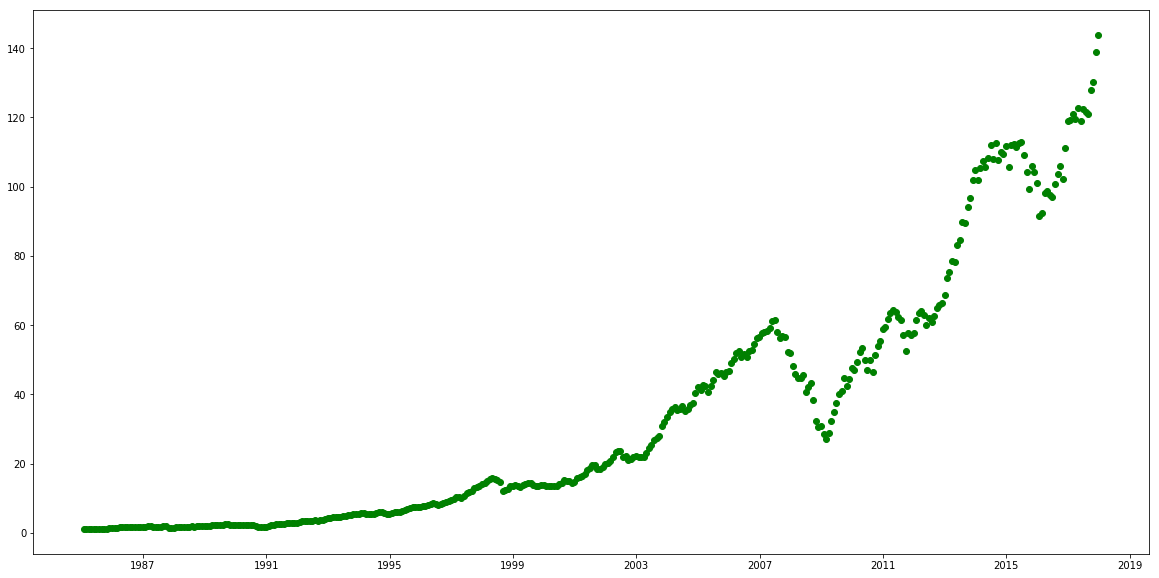

In [42]:
plt.figure(figsize=(20,10))
plt.plot_date(x=equally_weighted_df["date"],y=equally_weighted_df["equally_weighted_cum_return"], color='green')
plt.show()

## 1.3. Value Weighted Portfolio

In [43]:
date_list        = []
first_half_list  = []
second_half_list = []

value_weighted_month_return_list= []
value_weighted_1st_half_month_return_list= []
value_weighted_2nd_half_month_return_list= []

value_weighted_month_excess_return_list=[]
value_weighted_1st_half_month_excess_return_list=[]
value_weighted_2nd_half_month_excess_return_list=[]

value_weighted_month_mktrf_list = []
value_weighted_1st_half_month_mktrf_list = []
value_weighted_2nd_half_month_mktrf_list = []

for date in np.unique(stocks_all["date"]):
    date_list.append(date)    
    value_weighted_month_return                           = stocks_all.loc[(stocks_all["date"]==date)&(stocks_all["dividend_occured_last_12"]>0), "value_price_return"].sum() / stocks_all.loc[(stocks_all["date"]==date)&(stocks_all["dividend_occured_last_12"]>0), "value_price"].sum()
    value_weighted_month_excess_return                    = value_weighted_month_return-rf_df.loc[date,"rf"]
    value_weighted_month_mktrf                            = mktrf_df.loc[date, 'mktrf']
    value_weighted_month_return_list.append(                value_weighted_month_return)
    value_weighted_month_excess_return_list.append(         value_weighted_month_excess_return)
    value_weighted_month_mktrf_list.append(                 value_weighted_month_mktrf)
    
for date in first_half:
    first_half_list.append(date)    
    value_weighted_1st_half_month_return                  = stocks_all.loc[(stocks_all["date"]==date)&(stocks_all["dividend_occured_last_12"]>0), "value_price_return"].sum() / stocks_all.loc[(stocks_all["date"]==date)&(stocks_all["dividend_occured_last_12"]>0), "value_price"].sum()
    value_weighted_1st_half_month_excess_return           = value_weighted_1st_half_month_return-rf_df.loc[date,"rf"]
    value_weighted_1st_half_month_mktrf                   = mktrf_df.loc[date, 'mktrf']
    value_weighted_1st_half_month_return_list.append(       value_weighted_1st_half_month_return)
    value_weighted_1st_half_month_excess_return_list.append(value_weighted_1st_half_month_excess_return)
    value_weighted_1st_half_month_mktrf_list.append(        value_weighted_1st_half_month_mktrf)
    
    
for date in second_half:
    second_half_list.append(date)    
    value_weighted_2nd_half_month_return                  = stocks_all.loc[(stocks_all["date"]==date)&(stocks_all["dividend_occured_last_12"]>0), "value_price_return"].sum() / stocks_all.loc[(stocks_all["date"]==date)&(stocks_all["dividend_occured_last_12"]>0), "value_price"].sum()
    value_weighted_2nd_half_month_excess_return           = value_weighted_2nd_half_month_return-rf_df.loc[date,"rf"]
    value_weighted_2nd_half_month_mktrf                   = mktrf_df.loc[date, 'mktrf']
    value_weighted_2nd_half_month_return_list.append(       value_weighted_2nd_half_month_return)
    value_weighted_2nd_half_month_excess_return_list.append(value_weighted_2nd_half_month_excess_return)
    value_weighted_2nd_half_month_mktrf_list.append(        value_weighted_2nd_half_month_mktrf)    

In [44]:
value_weighted_df          = pd.DataFrame()
value_weighted_1st_half_df = pd.DataFrame()
value_weighted_2nd_half_df = pd.DataFrame()

value_weighted_df["date"]                                      = date_list
value_weighted_1st_half_df["date"]                             = first_half_list
value_weighted_2nd_half_df["date"]                             = second_half_list

value_weighted_df.index                                        = pd.DatetimeIndex(value_weighted_df         ["date"])
value_weighted_1st_half_df.index                               = pd.DatetimeIndex(value_weighted_1st_half_df["date"])
value_weighted_2nd_half_df.index                               = pd.DatetimeIndex(value_weighted_2nd_half_df["date"])

value_weighted_df         ["value_weighted_month_mktrf"]       = value_weighted_month_mktrf_list
value_weighted_1st_half_df["value_weighted_month_mktrf"]       = value_weighted_1st_half_month_mktrf_list
value_weighted_2nd_half_df["value_weighted_month_mktrf"]       = value_weighted_2nd_half_month_mktrf_list

value_weighted_df         ["value_weighted_month_return"]      = value_weighted_month_return_list
value_weighted_1st_half_df["value_weighted_month_return"]      = value_weighted_1st_half_month_return_list
value_weighted_2nd_half_df["value_weighted_month_return"]      = value_weighted_2nd_half_month_return_list

value_weighted_df         ["value_weighted_month_return_excess"] = value_weighted_month_excess_return_list
value_weighted_1st_half_df["value_weighted_month_return_excess"] = value_weighted_1st_half_month_excess_return_list
value_weighted_2nd_half_df["value_weighted_month_return_excess"] = value_weighted_2nd_half_month_excess_return_list

value_weighted_df         ["value_weighted_cum_return"]        = (value_weighted_df         ["value_weighted_month_return"]+1).cumprod()
value_weighted_1st_half_df["value_weighted_cum_return"]        = (value_weighted_1st_half_df["value_weighted_month_return"]+1).cumprod()
value_weighted_2nd_half_df["value_weighted_cum_return"]        = (value_weighted_2nd_half_df["value_weighted_month_return"]+1).cumprod()

value_weighted_df         ["value_weighted_cum_return_excess"] = (value_weighted_df         ["value_weighted_month_return_excess"]+1).cumprod()
value_weighted_1st_half_df["value_weighted_cum_return_excess"] = (value_weighted_1st_half_df["value_weighted_month_return_excess"]+1).cumprod()
value_weighted_2nd_half_df["value_weighted_cum_return_excess"] = (value_weighted_2nd_half_df["value_weighted_month_return_excess"]+1).cumprod()

value_weighted_annual_ret                                      = (value_weighted_df         ["value_weighted_month_return"]+1).cumprod().resample('A').agg('last').pct_change()
value_weighted_1st_half_annual_ret                             = (value_weighted_1st_half_df["value_weighted_month_return"]+1).cumprod().resample('A').agg('last').pct_change()
value_weighted_2nd_half_annual_ret                             = (value_weighted_2nd_half_df["value_weighted_month_return"]+1).cumprod().resample('A').agg('last').pct_change()

value_weighted_annual_ret_excess                               = (value_weighted_df         ["value_weighted_month_return_excess"]+1).cumprod().resample('A').agg('last').pct_change()
value_weighted_1st_half_annual_ret_excess                      = (value_weighted_1st_half_df["value_weighted_month_return_excess"]+1).cumprod().resample('A').agg('last').pct_change()
value_weighted_2nd_half_annual_ret_excess                      = (value_weighted_2nd_half_df["value_weighted_month_return_excess"]+1).cumprod().resample('A').agg('last').pct_change()

value_weighted_annual_ret_excess_mean                          = value_weighted_annual_ret_excess.mean()
value_weighted_1st_half_annual_ret_excess_mean                 = value_weighted_1st_half_annual_ret_excess.mean()
value_weighted_2nd_half_annual_ret_excess_mean                 = value_weighted_2nd_half_annual_ret_excess.mean()

value_weighted_annual_volatility                               = value_weighted_df         ["value_weighted_month_return_excess"].std() * np.sqrt(12)
value_weighted_1st_half_annual_volatility                      = value_weighted_1st_half_df["value_weighted_month_return_excess"].std() * np.sqrt(12)
value_weighted_2nd_half_annual_volatility                      = value_weighted_2nd_half_df["value_weighted_month_return_excess"].std() * np.sqrt(12)

value_weighted_sharpe_ratio                                    = value_weighted_annual_ret_excess_mean          / value_weighted_annual_volatility
value_weighted_1st_half_sharpe_ratio                           = value_weighted_1st_half_annual_ret_excess_mean / value_weighted_1st_half_annual_volatility
value_weighted_2nd_half_sharpe_ratio                           = value_weighted_2nd_half_annual_ret_excess_mean / value_weighted_2nd_half_annual_volatility

In [45]:
value_weighted_df

,date,value_weighted_month_mktrf,value_weighted_month_return,value_weighted_month_return_excess,value_weighted_cum_return,value_weighted_cum_return_excess
date,,,,,,
1985-01-31,1985-01-31,0.0799,0.164557,0.158057,1.164557,1.158057
1985-02-28,1985-02-28,0.0122,0.026263,0.020463,1.195142,1.181755
1985-03-29,1985-03-29,-0.0084,0.004257,-0.001943,1.200230,1.179459
1985-04-30,1985-04-30,-0.0096,0.004190,-0.003010,1.205259,1.175908
1985-05-31,1985-05-31,0.0509,0.064282,0.057682,1.282736,1.243737
1985-06-28,1985-06-28,0.0127,0.021945,0.016445,1.310886,1.264191
1985-07-31,1985-07-31,-0.0074,0.000143,-0.006057,1.311073,1.256534
1985-08-30,1985-08-30,-0.0102,-0.000455,-0.005955,1.310476,1.249051
1985-09-30,1985-09-30,-0.0454,-0.032730,-0.038730,1.267584,1.200675


In [46]:
value_weighted_1st_half_df

,date,value_weighted_month_mktrf,value_weighted_month_return,value_weighted_month_return_excess,value_weighted_cum_return,value_weighted_cum_return_excess
date,,,,,,
1985-01-31,1985-01-31,0.0799,0.164557,0.158057,1.164557,1.158057
1985-02-28,1985-02-28,0.0122,0.026263,0.020463,1.195142,1.181755
1985-03-29,1985-03-29,-0.0084,0.004257,-0.001943,1.200230,1.179459
1985-04-30,1985-04-30,-0.0096,0.004190,-0.003010,1.205259,1.175908
1985-05-31,1985-05-31,0.0509,0.064282,0.057682,1.282736,1.243737
1985-06-28,1985-06-28,0.0127,0.021945,0.016445,1.310886,1.264191
1985-07-31,1985-07-31,-0.0074,0.000143,-0.006057,1.311073,1.256534
1985-08-30,1985-08-30,-0.0102,-0.000455,-0.005955,1.310476,1.249051
1985-09-30,1985-09-30,-0.0454,-0.032730,-0.038730,1.267584,1.200675


In [47]:
value_weighted_2nd_half_df

,date,value_weighted_month_mktrf,value_weighted_month_return,value_weighted_month_return_excess,value_weighted_cum_return,value_weighted_cum_return_excess
date,,,,,,
2001-07-31,2001-07-31,-0.0213,-0.086308,-0.089308,0.913692,0.910692
2001-08-31,2001-08-31,-0.0646,-0.051106,-0.054206,0.866997,0.861327
2001-09-28,2001-09-28,-0.0925,-0.113356,-0.116156,0.768718,0.761279
2001-10-31,2001-10-31,0.0246,-0.081547,-0.083747,0.706031,0.697524
2001-11-30,2001-11-30,0.0754,0.033736,0.032036,0.729849,0.719870
2001-12-31,2001-12-31,0.0161,0.088200,0.086700,0.794222,0.782282
2002-01-31,2002-01-31,-0.0144,-0.027961,-0.029361,0.772015,0.759313
2002-02-28,2002-02-28,-0.0229,-0.001418,-0.002718,0.770920,0.757249
2002-03-28,2002-03-28,0.0424,0.028885,0.027585,0.793188,0.778138


### 1.3.1. Sharpe Ratio

In [48]:
value_weighted_sharpe_ratio

0.9698769134774647

### 1.3.2 Average Returns

In [49]:
value_weighted_annual_ret.mean()

0.21218347741650048

### 1.3.3. Standard Deviation

In [50]:
value_weighted_annual_volatility

0.17975713343990832

### 1.3.4 Aphas and Betas 

In [51]:
# split dependent and independent variable
y_value = value_weighted_df["value_weighted_month_return"]
X_value = value_weighted_df["value_weighted_month_mktrf"]

# Add a constant to the independent value
X1_value = sm.add_constant(X_value)

# make regression model 
model_value = sm.OLS(y_value, X1_value)

# fit model and print results
results_value = model_value.fit()
print(results_value.summary())

                                 OLS Regression Results                                
Dep. Variable:     value_weighted_month_return   R-squared:                       0.648
Model:                                     OLS   Adj. R-squared:                  0.648
Method:                          Least Squares   F-statistic:                     726.7
Date:                         Sun, 01 Apr 2018   Prob (F-statistic):           1.81e-91
Time:                                 18:52:21   Log-Likelihood:                 816.84
No. Observations:                          396   AIC:                            -1630.
Df Residuals:                              394   BIC:                            -1622.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

### 1.3.5 Half-Period Sharpe Ratio

In [52]:
value_weighted_1st_half_sharpe_ratio

1.0207347857231839

In [53]:
value_weighted_2nd_half_sharpe_ratio

1.0011916457872145

### 1.3.6 Portfolio Cumulative Return Chart

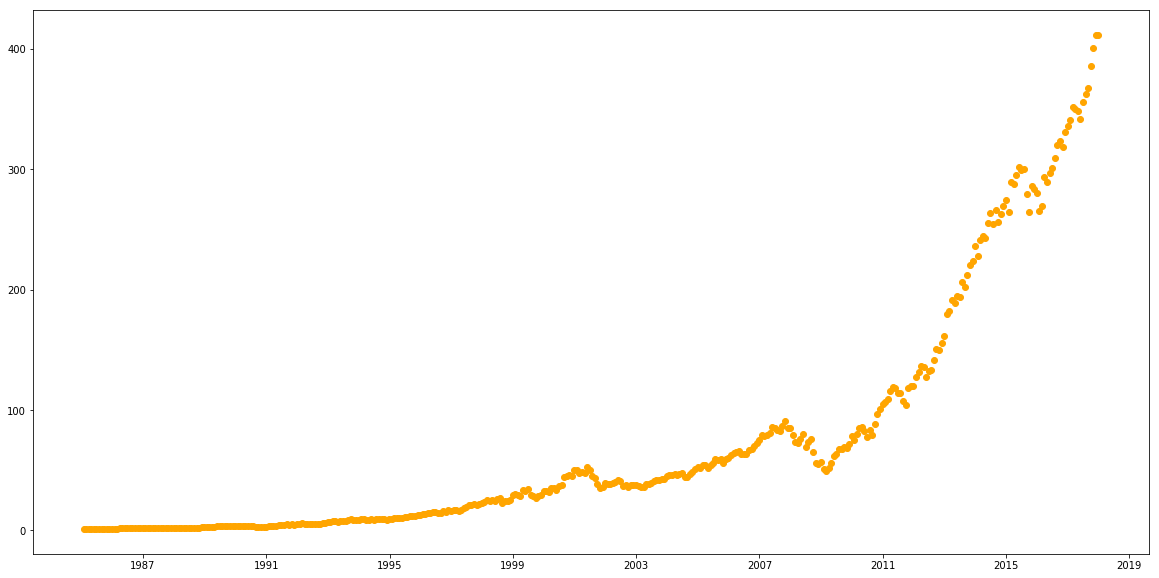

In [54]:
plt.figure(figsize=(20,10))
plt.plot_date(x=value_weighted_df["date"],y=value_weighted_df["value_weighted_cum_return"], color='orange')
plt.show()